In [42]:
#jk

In [43]:
# modular coding of the above projects with MLflow
### https://github.com/neerajbafila/pytorch-CNN

import os
ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)

In [44]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [45]:
!ls

 demo_df_keras.ipynb	  dog_cat_classification   pytorch_basics.ipynb
 demo_pytorch_CNN.ipynb   FashionMNISTDir	  'Untitled folder'


In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [47]:
class Config:
  def __init__(self):
    self.ROOT_DATA_DIR = "FashionMNISTDir"
    self.EPOCH = 10
    self.BATCH_SIZE = 32
    self.LEARNING_RATE = 0.01
    self.IMAGE_SIZE = (28, 28)
    self.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"this notebook is using device: {self.DEVICE}")
    self.SEED = 2022

config = Config()

this notebook is using device: cuda


In [48]:
train_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root = config.ROOT_DATA_DIR,
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

In [49]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [50]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [51]:
train_data.class_to_idx

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [52]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [53]:
given_label_map = train_data.class_to_idx
given_label_map

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

In [54]:
label_map = {val: key for key, val in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

##Visualize one of the samples

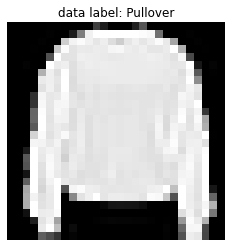

In [55]:
def view_sample_img(data, idx, label_map):
  plt.imshow(data.data[idx], cmap="gray")
  plt.title(f"data label: {label_map[data.targets[idx].item()]}")
  plt.axis("off")

view_sample_img(train_data, 7, label_map)

## Create the dataloader

In [56]:
train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = config.BATCH_SIZE,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = config.BATCH_SIZE,
    shuffle = False
)

In [57]:
train_data_loader

In [58]:
for images, labels in train_data_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [59]:
images[0].shape

torch.Size([1, 28, 28])

In [60]:
images[0].squeeze().shape

torch.Size([28, 28])

In [61]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.21960784, 0.07058824, 0.25882354,
        0.36078432, 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.06666667, 0.30980393,
        0.21960784, 0.        , 0.8627451 , 0.8627451 , 0.827451  ,
        0.27058825, 0.        , 0.36862746, 0.19607843, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.01176471, 0.3137255 , 0.3764706 , 0.36078432,
        0.3137255 , 0.03921569, 0.12156863, 1.        , 0.62352943,
        0.        , 0.1686

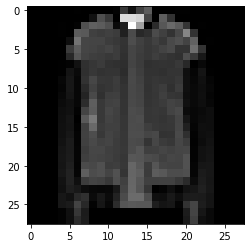

In [62]:
plt.imshow(images[0].squeeze(), cmap="gray")

In [63]:
images[0].shape, images[0].squeeze().shape, images[0].unsqueeze(dim=1).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]), torch.Size([1, 1, 28, 28]))

In [64]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0118, 0.2196, 0.0706, 0.2588, 0.3608,
          0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0667, 0.3098, 0.2196, 0.0000, 0.8627, 0.8627, 0.8275, 0.2706,
          0.0000, 0.3686, 0.1961, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0118, 0.3137,
          0.3765, 0.3608, 0.3137, 0.0392, 0.1216, 1.0000, 0.6235, 0.0000,
          0.1686, 0.3412, 0.4118, 0.3608, 0.2078, 0.0000, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.3608, 0.3529,
          0.2510, 0.2392, 0.2510, 0.2392, 0.1294, 0.2941, 0.1569, 0.1843,
          0.2941, 0.2510, 0.2000, 0.2824, 0.5216, 0.1961,

In [65]:
images[0][0].shape

torch.Size([28, 28])

In [66]:
images[0].squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0118, 0.2196, 0.0706, 0.2588, 0.3608, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0667,
         0.3098, 0.2196, 0.0000, 0.8627, 0.8627, 0.8275, 0.2706, 0.0000, 0.3686,
         0.1961, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0118, 0.3137, 0.3765,
         0.3608, 0.3137, 0.0392, 0.1216, 1.0000, 0.6235, 0.0000, 0.1686, 0.3412,
         0.4118, 0.3608, 0.2078, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.3608, 0.3529, 0.2510,
         0.2392, 0.2510, 0.2392, 0.1294, 0.2941, 0.1569, 0.1843, 0.2941, 0.2510,
         0.2000, 0.2824, 0.5216, 0.1961, 0.0000, 0.0000

In [67]:
images[0].unsqueeze(dim=1)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0118, 0.2196, 0.0706, 0.2588, 0.3608,
           0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0667, 0.3098, 0.2196, 0.0000, 0.8627, 0.8627, 0.8275, 0.2706,
           0.0000, 0.3686, 0.1961, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0118, 0.3137,
           0.3765, 0.3608, 0.3137, 0.0392, 0.1216, 1.0000, 0.6235, 0.0000,
           0.1686, 0.3412, 0.4118, 0.3608, 0.2078, 0.0000, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.3608, 0.3529,
           0.2510, 0.2392, 0.2510, 0.2392, 0.1294, 0.2941, 0.1569, 0.1843,
           0.2941, 0.2510, 0.2000, 0.2824, 

In [68]:
# refer handwritten notebook for more details

class CNN(nn.Module):
  def __init__(self, in_, out_):
    super(CNN, self).__init__()

    # out_channels -> no.of filters/ expected no.of fetaure maps
    self.conv_pool_01 = nn.Sequential(
        nn.Conv2d(in_channels=in_, out_channels=8, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    # in_channels -> previous layer ouput feature maps
    self.conv_pool_02 = nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.Flatten = nn.Flatten()
    # linear -> Dense
    # FC -> fully connected layer
    self.FC_01 = nn.Linear(in_features=16*4*4, out_features=128)
    self.FC_02 = nn.Linear(in_features=128, out_features=64)
    self.FC_03 = nn.Linear(in_features=64, out_features=out_)



  def forward(self, x):
    x = self.conv_pool_01(x)
    x = self.conv_pool_02(x)
    x = self.Flatten(x)
    x = self.FC_01(x)
    x = F.relu(x)
    x = self.FC_02(x)
    x = F.relu(x)    
    x = self.FC_03(x)
    return x




In [69]:
model = CNN(1, 10) # CNN(input_channel, output_target_values)

print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [70]:
model.Flatten

Flatten(start_dim=1, end_dim=-1)

In [71]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [72]:
model.FC_01

Linear(in_features=256, out_features=128, bias=True)

In [73]:
model.parameters()

<generator object Module.parameters at 0x7f52ed9ea150>

In [74]:
# verify model is using CUDA or not
next(model.parameters()).is_cuda

False

In [75]:
# to make model to use CUDA
model.to(config.DEVICE)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [76]:
# now verify after making model to use CUDA.. means it will use GPU
next(model.parameters()).is_cuda

True

## Count the no. of trainable parameters

In [77]:
def count_params(model):
  model_params = {"Modules": list(), "Parameters": list()}
  total = {"trainable": 0, "non_trainable": 0} 
  for name, parameters in model.named_parameters():
    param = parameters.numel()
    if not parameters.requires_grad:
      total["non_trainable"] += param
      continue
    model_params["Modules"].append(name)
    model_params["Parameters"].append(param)
    total["trainable"] += param
  df = pd.DataFrame(model_params)
  df = df.style.set_caption(f"Total parameters: {total}")
  return df

count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


## Training loop

In [78]:
60000/32

1875.0

In [79]:
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE) # Adam optimizer

In [80]:
len(train_data_loader)  ## STEPS PER EPOCH 

1875

In [81]:
for epoch in range(config.EPOCH):
  with tqdm(train_data_loader) as tqdm_epoch:
    for images, labels in tqdm_epoch:
      tqdm_epoch.set_description(f"Epoch {epoch + 1}/{config.EPOCH}")

      # we will be getting images batch by batch
      # put the images on device
      # eventhough if we have CUDA setup, we need to mention the below lines to use CUDA, else it will use CPU
      images = images.to(config.DEVICE)
      labels = labels.to(config.DEVICE)

      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels) # passing the prediction and target to find loss

      # backward propogation
      optimizer.zero_grad() # past gradient.... making the past gradient to zero
      loss.backward()  #calculate the gradients
      # update the gradients(update the weight and bias).. ex: W(new) = W(old) - learningrate*(de/dw)
      optimizer.step() # weights updated
      
      # loss -> tensor outcome
      # loss.item() -> numerical value
      tqdm_epoch.set_postfix(loss=loss.item())


Epoch 10/10: 100%|██████████| 1875/1875 [00:39<00:00, 46.96it/s, loss=0.37]


## Save the model


In [82]:
os.makedirs("model_dir", exist_ok=True)
model_file_path = os.path.join("model_dir", "CNN_model.pth")
torch.save(model, model_file_path)

## Load the model

In [83]:
loaded_model = torch.load(model_file_path)

## Evaluate our model

In [84]:
pred = np.array([])
target = np.array([])

with torch.no_grad(): # no_grad -> we are NOT going to update anything, when we are doing prediction/evaluationg the model.
                      # we dont want to update any gradient
  for batch, data in enumerate(test_data_loader):
    images = data[0].to(config.DEVICE)
    labels = data[1].to(config.DEVICE)

    y_pred = model(images)

    pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
    target = np.concatenate((target, labels.cpu().numpy()))

In [85]:
pred

array([9., 2., 1., ..., 8., 1., 5.])

In [86]:
target

array([9., 2., 1., ..., 8., 1., 5.])

In [88]:
cm = confusion_matrix(target, pred)
cm

array([[866,   1,  19,  28,   5,   1,  68,   0,  12,   0],
       [  4, 968,   0,  21,   0,   0,   5,   0,   2,   0],
       [ 17,   0, 796,   6, 113,   0,  61,   0,   7,   0],
       [ 34,   4,   6, 872,  48,   0,  35,   0,   1,   0],
       [  1,   4, 106,  26, 763,   0,  94,   0,   6,   0],
       [  0,   0,   0,   4,   0, 939,   0,  51,   1,   5],
       [262,   1, 125,  34,  83,   1, 475,   0,  19,   0],
       [  0,   0,   0,   0,   0,   7,   0, 970,   0,  23],
       [  1,   1,   5,   3,   2,   2,   9,   4, 973,   0],
       [  0,   0,   0,   0,   0,  18,   0,  38,   2, 942]])

In [89]:
label_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

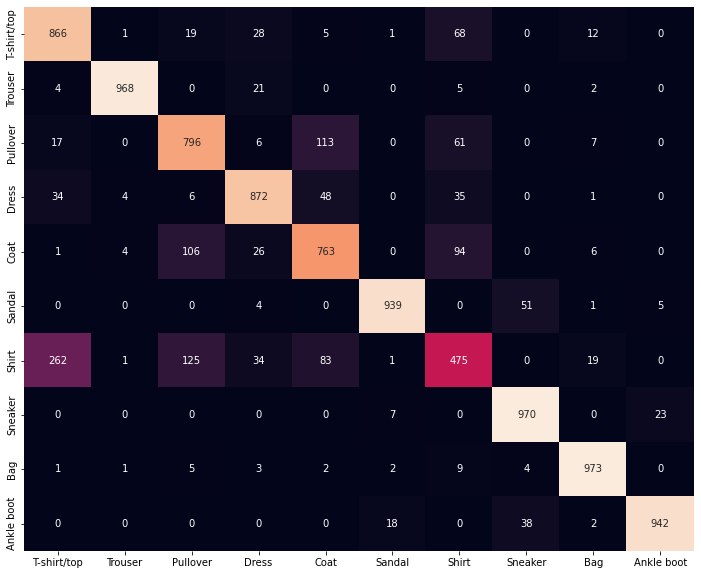

In [90]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values() , yticklabels=label_map.values(), cbar=False)

## prediction on our model

In [91]:
data = next(iter(test_data_loader)) # to get first batch in test_data_loader
data

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [93]:
len(data) #[images, lables]

2

In [94]:
images, labels = data

In [96]:
images.shape # [batch_size, channel, width, height]

torch.Size([32, 1, 28, 28])

In [98]:
# to get single image
idx = 2
img = images[idx]
img.shape # [channel, width, height]

torch.Size([1, 28, 28])

In [101]:
label = labels[idx]
label_map[label.item()]

'Trouser'

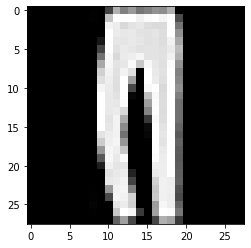

In [102]:
plt.imshow(img.squeeze(), cmap="gray")

In [104]:
img.unsqueeze(dim=1).shape

torch.Size([1, 1, 28, 28])

In [106]:
# model expects this format:  [batch_size, channel, width, height]
# model is on the device "CUDA". so Image we are passing also should be on the device "CUDA"
# ouput of the model willbe logit values, we need to pass that value into softmax
logit = model(img.unsqueeze(dim=1).to(config.DEVICE))
logit

tensor([[ -39.9801,   61.6894, -104.2520,  -21.9062,  -61.7489, -151.6727,
          -51.8244, -252.2879, -113.7111, -218.4231]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [107]:
sum([ -39.9801,   61.6894, -104.2520,  -21.9062,  -61.7489, -151.6727,
          -51.8244, -252.2879, -113.7111, -218.4231])

-954.117

In [108]:
# pass the logit values to softmax
# should mention dim=1
# sum of output of softmax function willbe 1.0
pred_prob = F.softmax(logit, dim=1)
pred_prob

tensor([[7.0065e-45, 1.0000e+00, 0.0000e+00, 4.9533e-37, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [109]:
sum([7.0065e-45, 1.0000e+00, 0.0000e+00, 4.9533e-37, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

1.0

In [110]:
# to get the maximum probability
argmax = torch.argmax(pred_prob).item()
argmax 

1

In [111]:
label_map[argmax]

'Trouser'

In [112]:
def predict(data, model, label_map, device, idx=0):
  images, labels = data
  img = images[idx]
  label = labels[idx]

  plt.imshow(img.squeeze(), cmap="gray")
  logit = model(img.unsqueeze(dim=1).to(config.DEVICE))
  pred_prob = F.softmax(logit, dim=1)
  argmax = torch.argmax(pred_prob).item()
  
  predicted_label = label_map[argmax]
  actual_label = label_map[label.item()]

  plt.title(f"actual: {actual_label} | predicted: {predicted_label}")
  plt.axis("off")
  return predicted_label, actual_label

('Trouser', 'Trouser')

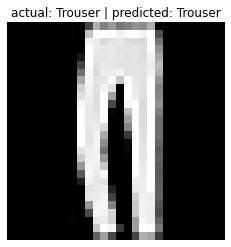

In [113]:
predict(data, model, label_map, config.DEVICE, idx=2)

In [ ]:
# to convert one model to another refer
# https://onnx.ai/